In [1]:
## Importing Libraries:

In [2]:
# Data Structures
import numpy  as np
import pandas as pd

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [3]:
## Corpus Loading:

In [4]:
data = pd.read_csv('datasets/extracted_text.csv', encoding='utf-8')
data.head(20)

,Number,User,Date Submitted,Country,Source URL,Device,Browser,OS,Hotjar User ID,Como você avaliaria sua satisfação com o preenchimento do currículo da Gupy?,Comentário
0,11958,a7e27849,2022-05-25 19:24:39,Brazil,https://sicredi.gupy.io/candidates/application...,phone,Mobile Safari UI/WKWebView,iOS 15.4.1,a7e27849-b8a4-558b-ac2f-240da4d918fa,4,NaN
1,11957,21cbd0cc,2022-05-25 19:24:22,Brazil,https://sicredi.gupy.io/candidates/application...,phone,Chrome Mobile 101.0.4951,Android 12,21cbd0cc-88d9-5515-aef2-d754c584f64b,5,.
2,11956,2246a0b5,2022-05-25 19:22:36,Brazil,https://jadlog.gupy.io/candidates/applications...,desktop,Chrome 101.0.4951,Windows 8.1,2246a0b5-2f0d-54ff-839a-4dce66092fd4,5,Foi muito tranquilo e rápido
3,11955,908e7ea5,2022-05-25 19:15:22,Brazil,https://dock.gupy.io/candidates/applications/1...,phone,Chrome Mobile 101.0.4951,Android 11,908e7ea5-216c-55eb-bf68-8092c03f316c,5,NaN
4,11954,fb19dfa4,2022-05-25 19:10:06,Brazil,https://hrsbc.gupy.io/candidates/applications/...,desktop,Chrome 102.0.5005,Windows 10,fb19dfa4-8a8e-5d94-8332-56d037da812e,5,NaN
5,11953,916f2c49,2022-05-25 19:07:45,Brazil,https://davitatratamentorenal.gupy.io/candidat...,desktop,Chrome 101.0.4951,Windows 10,916f2c49-c951-56f7-a2b0-e0b0dc87e064,5,NaN
6,11952,8fbfec38,2022-05-25 19:06:04,Brazil,https://animale.gupy.io/candidates/application...,phone,Mobile Safari 15.4,iOS 15.4.1,8fbfec38-ef8d-5d15-86f1-55a37c2f28e0,5,Foi tudo ótimo.
7,11951,3a1d361b,2022-05-25 18:53:15,Brazil,https://hprojekt.gupy.io/candidates/applicatio...,desktop,Chrome 101.0.4951,Windows 10,3a1d361b-3fd1-52e1-9e52-e0754b3e5027,5,Muito rápido e objetivo.
8,11950,e02b0c3c,2022-05-25 18:52:46,Brazil,https://casaevideo.gupy.io/candidates/applicat...,phone,Mobile Safari 15.4,iOS 15.4.1,e02b0c3c-93f1-58b2-bb61-29ab3dca772d,5,tudo perfeito
9,11949,d9bda9af,2022-05-25 18:51:55,Brazil,https://contabilizei.gupy.io/candidates/applic...,desktop,Chrome 101.0.4951,Windows 10,d9bda9af-e211-5cc1-9e26-9296f9e7a4c8,5,NaN


In [5]:
data = data.dropna(subset=['Comentário']) # Remove NaN cells

In [6]:
data.columns = map(str.lower, data.columns)
data.head(20)

,number,user,date submitted,country,source url,device,browser,os,hotjar user id,como você avaliaria sua satisfação com o preenchimento do currículo da gupy?,comentário
1,11957,21cbd0cc,2022-05-25 19:24:22,Brazil,https://sicredi.gupy.io/candidates/application...,phone,Chrome Mobile 101.0.4951,Android 12,21cbd0cc-88d9-5515-aef2-d754c584f64b,5,.
2,11956,2246a0b5,2022-05-25 19:22:36,Brazil,https://jadlog.gupy.io/candidates/applications...,desktop,Chrome 101.0.4951,Windows 8.1,2246a0b5-2f0d-54ff-839a-4dce66092fd4,5,Foi muito tranquilo e rápido
6,11952,8fbfec38,2022-05-25 19:06:04,Brazil,https://animale.gupy.io/candidates/application...,phone,Mobile Safari 15.4,iOS 15.4.1,8fbfec38-ef8d-5d15-86f1-55a37c2f28e0,5,Foi tudo ótimo.
7,11951,3a1d361b,2022-05-25 18:53:15,Brazil,https://hprojekt.gupy.io/candidates/applicatio...,desktop,Chrome 101.0.4951,Windows 10,3a1d361b-3fd1-52e1-9e52-e0754b3e5027,5,Muito rápido e objetivo.
8,11950,e02b0c3c,2022-05-25 18:52:46,Brazil,https://casaevideo.gupy.io/candidates/applicat...,phone,Mobile Safari 15.4,iOS 15.4.1,e02b0c3c-93f1-58b2-bb61-29ab3dca772d,5,tudo perfeito
11,11947,f8d5e3bd,2022-05-25 18:46:42,Brazil,https://grupobravante.gupy.io/candidates/appli...,desktop,Chrome 101.0.4951,Windows 10,f8d5e3bd-8ef4-5fd4-83f7-e6c5dfd343a5,5,Não! Um muito obrigado pela Oportunidade....
12,11946,b6c71f49,2022-05-25 18:46:30,Brazil,https://habibs.gupy.io/candidates/applications...,desktop,Chrome 102.0.5005,Windows 10,b6c71f49-7ed5-570c-83da-758cf26bc59a,5,Me encaixando para a oportunidade de trabalho.
14,11944,54c25c53,2022-05-25 18:45:21,Brazil,https://lojahavan.gupy.io/candidates/applicati...,phone,Chrome Mobile 101.0.4951,Android 10,54c25c53-fc7a-5452-beff-72cc35fdbac4,4,Bom
15,11943,57444c13,2022-05-25 18:44:40,Brazil,https://ambev.gupy.io/candidates/applications/...,desktop,Edge 101.0.1210,Windows 7,57444c13-663f-58e1-a745-94b2954ba17c,5,","
16,11942,f74cfdd0,2022-05-25 18:43:57,Brazil,https://ambev.gupy.io/candidates/applications/...,desktop,Chrome 101.0.4951,Windows 10,f74cfdd0-586c-5ae6-ab03-b69240a74693,5,o atendimento foi otimo no 10 :)


In [7]:
corpus = data['comentário'].tolist()
corpus[0:20]

['.',
 'Foi muito tranquilo e rápido',
 'Foi tudo ótimo.',
 'Muito rápido e objetivo.',
 'tudo perfeito',
 'Não! Um muito obrigado pela Oportunidade....',
 'Me encaixando para a oportunidade de trabalho.',
 'Bom',
 ',',
 'o atendimento foi otimo no 10 :)',
 'Me contratando....',
 'nada...',
 'Gostei',
 'Muito bom',
 'Perguntas mais simples',
 '.',
 'Muito bom',
 'excelente',
 'facilidade entendimento',
 'On']

In [8]:
## Corpus Processing

### 1. Stop Words and Stemming

In [9]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [10]:
### 2. The main corpus processing function.

In [11]:
def processCorpus(corpus, language):
    nltk.download('stopwords')
    nltk.download('punkt')
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    positive_praise = [line.rstrip('\n') for line in open('lists/positive_praise.txt')] # Load .txt file line by line
    other_words = [line.rstrip('\n') for line in open('lists/stopwords_scrapmaker.txt')] # Load .txt file line by line

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = removeWords(listOfTokens, positive_praise)
        listOfTokens = removeWords(listOfTokens, other_words)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [12]:
language = 'portuguese'
corpus = processCorpus(corpus, language)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
corpus[0:20]

['',
 '',
 '',
 '',
 '',
 '....',
 '',
 '',
 '',
 'atend otim',
 'contrat ....',
 '...',
 'gost',
 '',
 'pergunt',
 '',
 '',
 '',
 'facil entend',
 '']

In [14]:
corpus = list(filter(None, corpus)) # remove empty strings

In [15]:
corpus[0:20]

['....',
 'atend otim',
 'contrat ....',
 '...',
 'gost',
 'pergunt',
 'facil entend',
 'ferrament intuit',
 'pratic facil',
 'pergunt desnecessar',
 'total satisfeit',
 'otim',
 'preench inform',
 'eeeee',
 'otim',
 'satisfeit',
 'pra precis melhor',
 'satisfeit',
 'comentari',
 'curricul diret pont enrol']

In [16]:
corpus = [i for i in corpus if i != '....']
corpus = [i for i in corpus if i != '...']

In [17]:
corpus[0:20]

['atend otim',
 'contrat ....',
 'gost',
 'pergunt',
 'facil entend',
 'ferrament intuit',
 'pratic facil',
 'pergunt desnecessar',
 'total satisfeit',
 'otim',
 'preench inform',
 'eeeee',
 'otim',
 'satisfeit',
 'pra precis melhor',
 'satisfeit',
 'comentari',
 'curricul diret pont enrol',
 'versatil pra inform',
 'cert']

In [18]:
### Statistical Weighting of Words

In [19]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))

2648 rows


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647
atend,0.872982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
otim,0.487752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aba,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abert,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abil,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
## K-Means

##### Function that runs the K-Means algorithm *max_k* times and returns a dictionary of each k result

In [22]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [23]:
#### Silhouette Score

##### The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [24]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [25]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1316

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


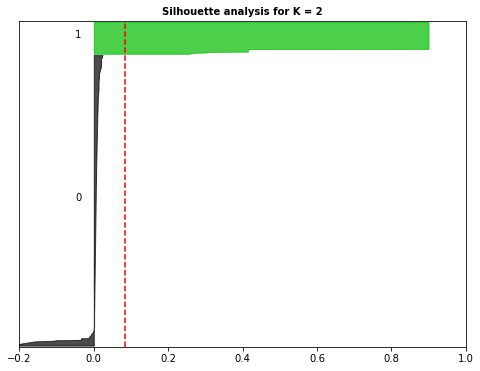

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


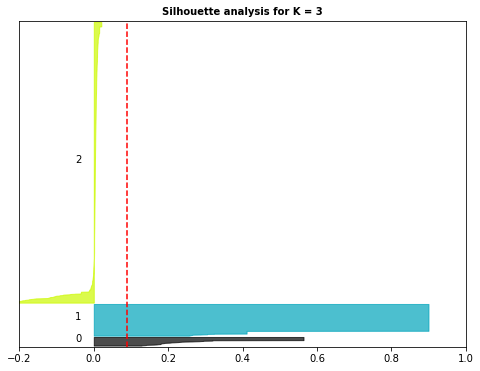

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


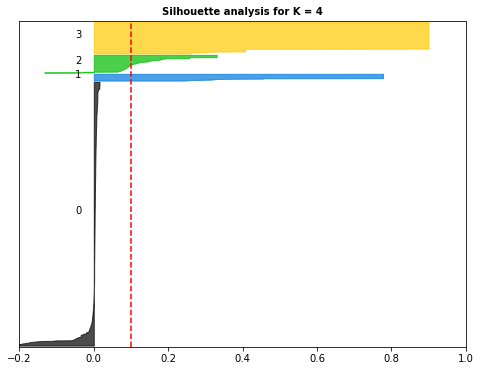

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


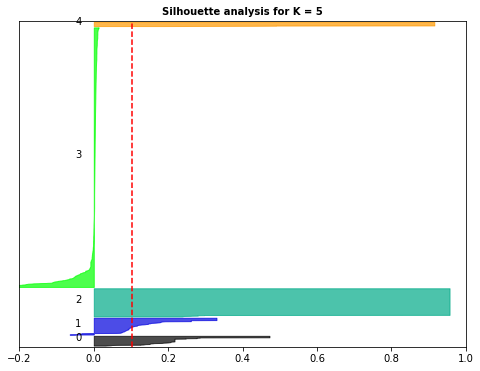

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


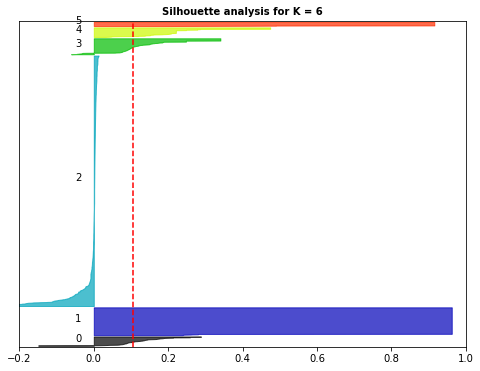

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


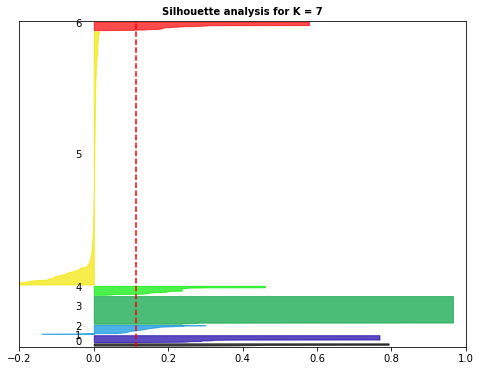

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


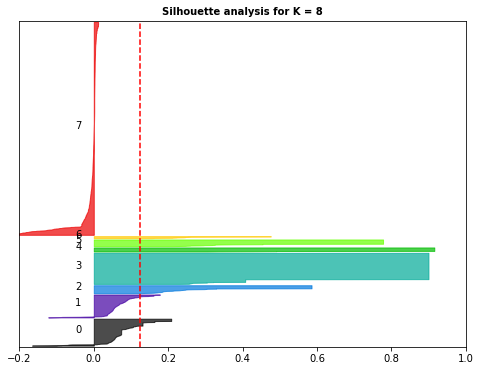

In [26]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

In [27]:
## Cluster Analysis

In [28]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

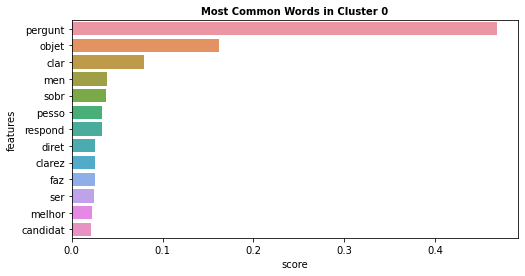

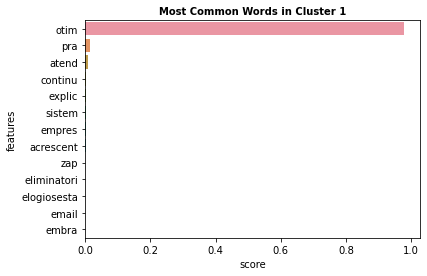

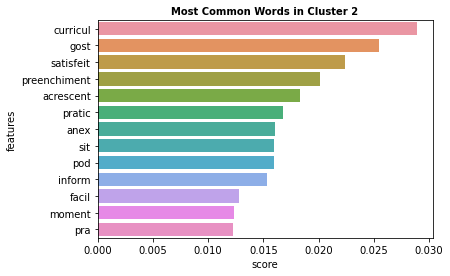

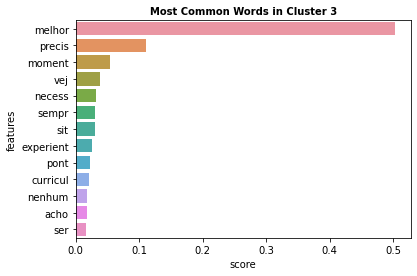

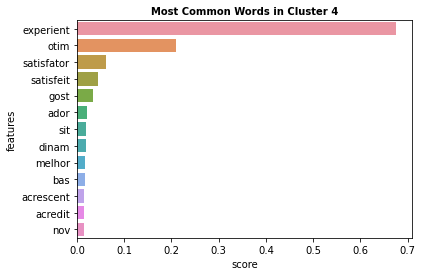

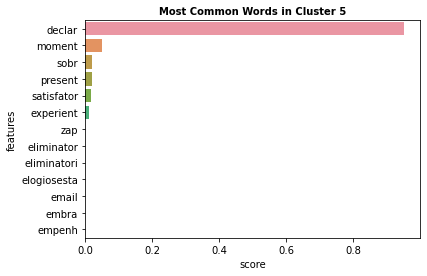

In [29]:
best_result = 6
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [30]:
#### Map of Words

In [31]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

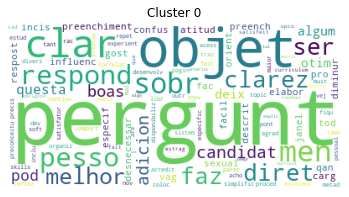

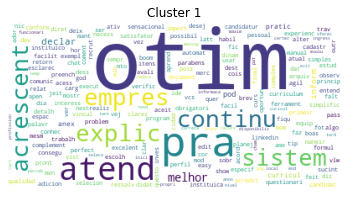

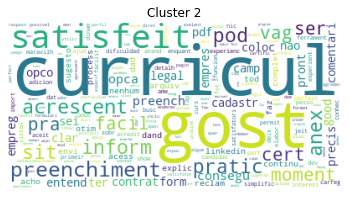

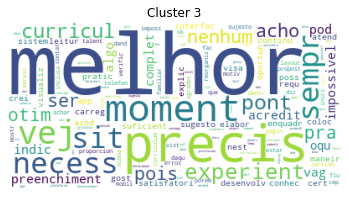

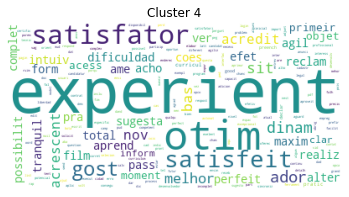

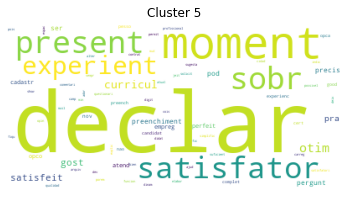

In [32]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)